<a href="https://colab.research.google.com/gist/Bobrinik/329f0066d7b0fe0580553d192d1bf653/congresstrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Bobrinik/finnancial_explorations/main/data/cong_data.csv")

In [3]:
df

,filling_date,transaction_type
0,2024-04-04,sell
1,2024-04-04,sell
2,2024-04-04,buy
3,2024-04-04,buy
4,2024-04-02,sell
...,...,...
37645,2021-04-15,buy
37646,2021-04-14,buy
37647,2021-04-14,buy
37648,2021-04-14,buy


In [8]:
df.index = pd.to_datetime(df.filling_date)

In [11]:
# So that we can build a nice graph later
df.loc[df.transaction_type == "sell", "signal"] = -1
df.loc[df.transaction_type == "buy", "signal"] = 1

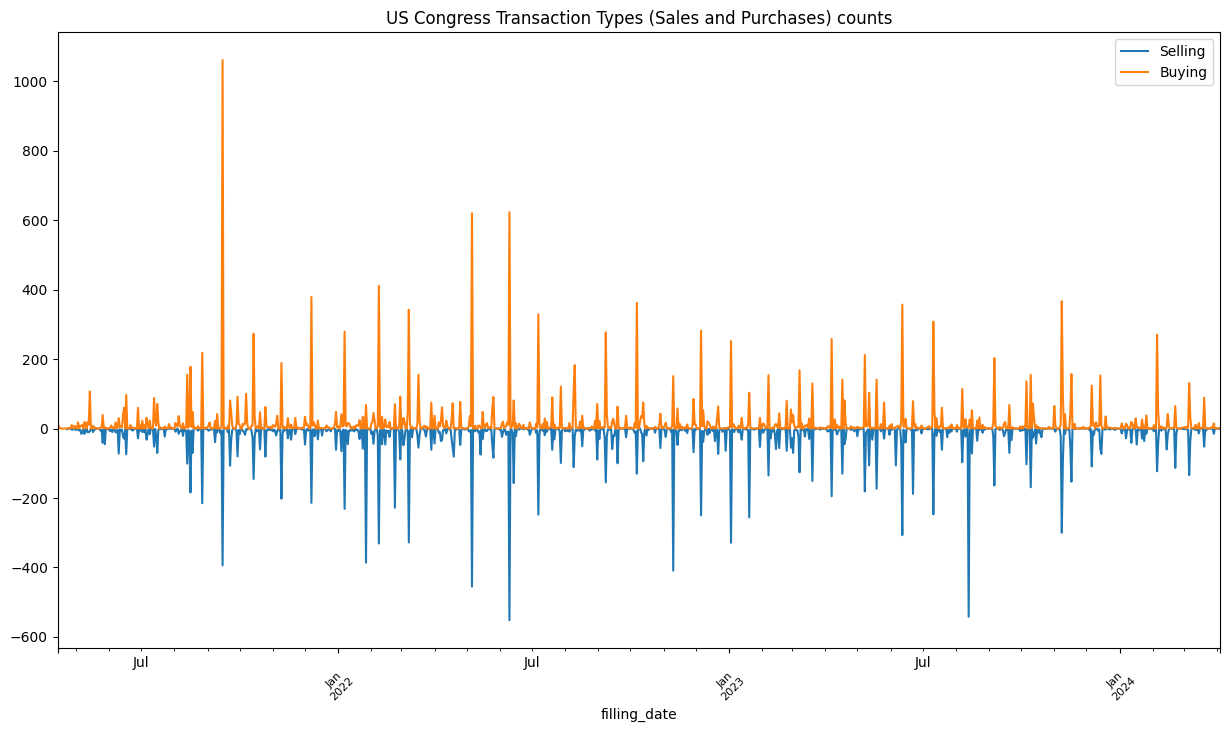

In [12]:
fig, ax = plt.subplots(figsize=(15,8))

(df[df["transaction_type"] == "sell"].resample("D").sum()["signal"]).plot(ax=ax, label='Selling')
(df[df["transaction_type"] == "buy"].resample("D").sum()["signal"]).plot(ax=ax, label='Buying')

# Add legend to the plot
ax.legend()

ax.set_title("US Congress Transaction Types (Sales and Purchases) counts")

plt.setp(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='x', labelsize=8, pad=10)

# Show plot
plt.show()